## Earth's Atmospheric Composition: Computer Laboratory #1

Paul Palmer, University of Edinburgh (paul.palmer@ed.ac.uk)

### Contents:

The learning objectives of this lab are:
1. Understand what is an e-folding lifetime.
2. Understand what determines the lifetime of a gas that is subject to different loss processes.
3. Understand the relevance of an e-folding lifetime is to atmospheric composition.

This is a [Jupyter](https://www.jupyter.org "Jupyter's Homepage") notebook, which allows you to use the power of Python without much knowledge of the language.

**To run the code below:**
1. Click on the cell to select it.
2. Press SHIFT+ENTER on your keyboard or press the play button () in the toolbar above.

### Exercise #1: Box model describing time-dependent mass of gas X


<img src="http://www.geos.ed.ac.uk/~ppalmer/jupyter/images/massbalance.jpg">


The following equation is a simple mass balance model that describes the change in mass of gas $X$ as a function of time $t$:
\begin{equation}
\frac{dX}{dt} = S - \frac{X}{\tau}, 
\end{equation}
where mass is determined by a source $S$ (mass/time) and a loss that is described by an e-folding lifetime $\tau$ (time). 

Rearranging and integrating this equation:
\begin{equation}
X(t)=X_0\exp^{-\frac{t}{\tau}},
\end{equation}
where $X_0$ is the carbon mass at time $t=0$.


The following piece of code describes this equation. In this example, we have ignored $S$ ($S$=0), used $\tau=20$ seconds and X$_0$=10 units. Below we explore the role of $S$ in the model.

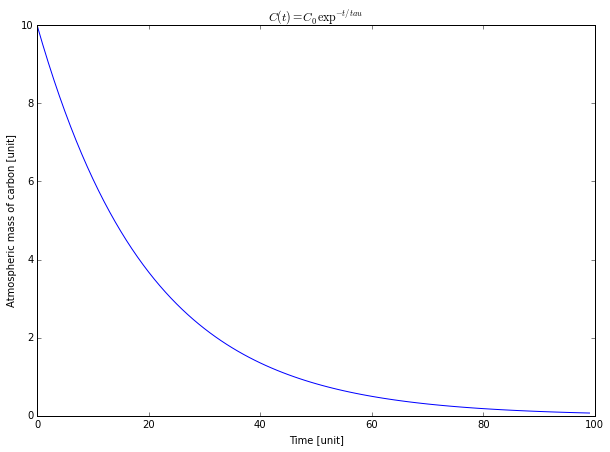

In [2]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
import pylab as plt
import math

tau = 20. # 1/seconds
c_0 = 10.
c = []
t = np.arange(100)

for ii in np.arange(len(t)): c.append(c_0*np.exp(-t[ii]/tau))

plt.figure(figsize=(10,7))
plt.plot(t,c)
plt.xlabel('Time [unit]')
plt.ylabel('Atmospheric mass of carbon [unit]')
plt.title('$C(t)=C_0\exp^{-t/tau}$')


We can explore a few key concepts with this simple model: 1) e-folding lifetime and 2) mass balance. 

From the figure above we can see that in the absence of a source the carbon mass progressively gets smaller, which is determined by $\tau$. Every time $t$ increases by a factor of $\tau$ the carbon mass is reduced by a factor of $e$, which has a value of approximately 2.72. At $t$=$\tau$, $C(\tau)=C_0\exp^{-1}$ and when $t=2\tau$, $C(2\tau) = C_0\exp^{-2}$. For the example above (using $C_0 = 10$ units) $C(\tau) = 10\exp^{-1} = 3.68$, $C(2\tau) = 10\exp^{-2} = 1.35$, ...

Below is an interactive version of the static figure above. The vertical and horizontal lines are giving you the corresponding values for $t$ and $C(t)$ for $t$=$\tau$ and $2\tau$. 

#### Activities
0. Use the slider to explore how the lifetime affects $C(t)$
1. Make sure you understand why in this model $C(t)$ reduces in a way that can be described by multiples of $e$.
2. What is the value of $C(3\tau)$? Double check by adjusting the code. 

C(t) at one e-folding lifetime:  3.68
C(t) at two e-folding lifetimes:  1.35


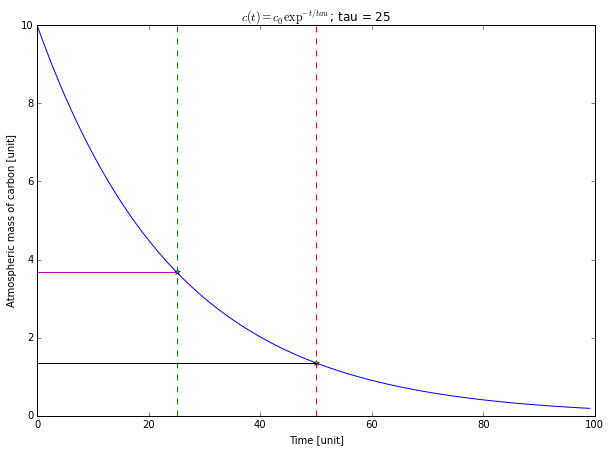

In [3]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
import pylab as plt
import math

def lifetime(tau):
    c_0 = 10.
    c = []  
    t = np.arange(100)
    for ii in np.arange(len(t)): c.append(c_0*np.exp(-t[ii]/tau))

    plt.figure(figsize=(10,7))
    plt.plot(t,c)
    
    # one e-folding lifetime
    cefold = np.exp(-1)*c_0
    # two e-folding lifetimes
    twocefold = np.exp(-2)*c_0

    print('C(t) at one e-folding lifetime: '+'{:5.2f}'.format(cefold))
    print('C(t) at two e-folding lifetimes: '+'{:5.2f}'.format(twocefold))
    
    plt.plot([tau,tau],[0,10],'--')
    plt.plot([2*tau,2*tau],[0,10],'--')
    plt.plot([tau],[cefold],'*')
    plt.plot([0,tau],[cefold,cefold])
    plt.plot([2*tau],[twocefold],'*')
    plt.plot([0,2*tau],[twocefold,twocefold])
    
    plt.xlabel('Time [unit]')
    plt.ylabel('Atmospheric mass of carbon [unit]')
    plt.title('$c(t)=c_0\exp^{-t/tau}$'+'; tau = '+str(tau))
    
    
interactive(lifetime,tau=(5,50,5))

### Side issue: Calculation to support Class 5

This code demonstrates how the lifetime of a trace gas, $\tau$ changes with percentage changes in the abundance of the hydroxyl radical [OH]. We saw in class that if we changed the lifetime of OH by X then the percentage change in lifetime is given by
\begin{equation}
\Delta\tau= \frac{-X}{1+X}
\end{equation}

So as X gets bigger $\Delta\tau$ approaches -1. The following interactive figure should give you some idea of how it works...

0.7


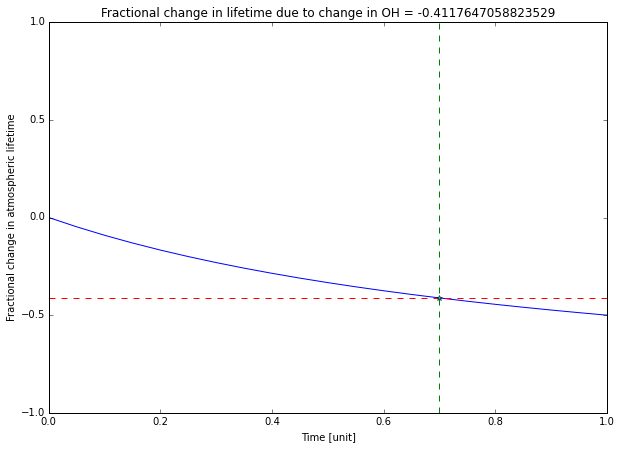

In [4]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
import pylab as plt
import math

def deltaPClifetime(deltaohIN):

    deltatau = []  
    deltaoh = np.arange(0.0,1.1,0.05)    
    for ii in np.arange(len(deltaoh)): deltatau.append(-deltaoh[ii]/(1+deltaoh[ii]))
    
    plt.figure(figsize=(10,7))
    plt.plot(deltaoh,deltatau)
    
    deltatauOUT = -deltaohIN/(1+deltaohIN)
    
    print(deltaohIN)
    
    plt.plot([deltaohIN,deltaohIN],[-1,1.0],'--')
    plt.plot([0,1.1],[deltatauOUT,deltatauOUT],'--')
    plt.plot([deltaohIN],[deltatauOUT],'*')
    plt.xlim([0,1.0])
    
    plt.xlabel('Percentage changes in the abundance of the hydroxyl radical [OH]')
    plt.ylabel('Fractional change in atmospheric lifetime')
    plt.title('Fractional change in lifetime due to change in OH = '+str(deltatauOUT))
    
    
interactive(deltaPClifetime,deltaohIN=(0.1,1.0,0.1))

### Exercise #2: Mass balance box model of gas X

Let's return to the original mass balance equation as defined above:
\begin{equation}
\frac{dX}{dt} = S - \frac{X}{\tau}, 
\end{equation}
where all variables are defined as above.


#### Activities

1. In this activity we retain the source term $S$. 
 * Fix $X_0$ = 300 units and $\tau$ = 120 units. Adjust the source term from the minimum value of 1 to the maximum value of 5. What do you find?
 * Return all the sliders back to their middle position. This time adjust the $\tau$ slider from the smallest to the largest value. What do you find?
 * Now freely adjust the $X_0$ *and* $\tau$ sliders. What do you find?

2. For some pairs of model parameters (e.g., $X_0$ and $\tau$) you should have found a situation when $X(t)$ remains fixed in time for the entire period. What does mean? Given the value for $S$ and $\tau$ can you predict the fixed value?

3. For other model parameter values you will have found that $X(t)$ reached a steady value later in the run. What does that mean? Given the value for $S$ and $\tau$ can you predict the final steady value?

4. Do long-lived or short-lived gases respond quicker to changes in sources?

5. How do you think an atmospheric gas would respond to a rapidly varying source and a source that has a slower mode of varibility?

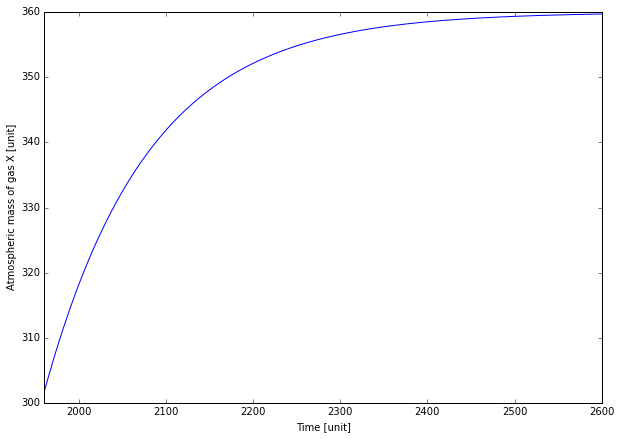

In [5]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
import pylab as plt
import math

def boxmodel(S,X0,tau):
    nyears = 1000 #2016-1957+1
    X     = []
    years = []
    
    # Initial conditions
    X.append(X0)
    years.append(1957)
    
    for ii in np.arange(nyears)+1:
        dX = S - (1./tau)*X[ii-1]
        X.append(X[ii-1]+dX)
        years.append(ii+1957)
        #print(S,(1./tau)*C[ii-1],C[ii])

    plt.figure(figsize=(10,7))
    plt.plot(years,X)
    plt.xlabel('Time [unit]')
    plt.xlim([1960,2600])
    plt.ylabel('Atmospheric mass of gas X [unit]')
    
    
interactive(boxmodel,S=(1,5,0.5),X0=(299,301,1),tau=(20,220,20))
